#### UCLA Extension – Data Science and Visualization
#### COM SCI X 450.2
#### Name: Franchi Uzcategui
#### Instructor: Ali El-Annan
#### Date: 08-26-2021

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

### Data 1 : California Gini Index, 2008-2018

Source: http://www.civicdashboards.com/state/california-04000US06/gini_index 

In [2]:
df1 = pd.read_csv("C:/Users/Franchi/Documents/450.2_EDA&V/data/CAL_GINI_INDEX.csv") #reading csv document
df1

,Unnamed: 0,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Ginin index,0.47,0.47,0.47,0.48,0.48,0.49,0.49,0.49,0.49,0.49,0.49


In [3]:
df1 = df1.T #transposing DataFrame
df1.shape #Verifying the transpose method

(12, 1)

In [4]:
df1.head()

,0
Unnamed: 0,Ginin index
2008,0.47
2009,0.47
2010,0.47
2011,0.48


In [5]:
df1 = df1.reset_index() #to get proper format of columns

In [6]:
df1.shape #now there are two columns instead of one column

(12, 2)

In [7]:
df1.columns = ['Year', 'Gini index'] #renaming columns
df_1 = df1.drop([0])#removing previous header columns
df_1 = df_1.reset_index(drop=True)
df_1 #data 1 is cleaned to use

,Year,Gini index
0,2008,0.47
1,2009,0.47
2,2010,0.47
3,2011,0.48
4,2012,0.48
5,2013,0.49
6,2014,0.49
7,2015,0.49
8,2016,0.49
9,2017,0.49


In [8]:
print(df_1.dtypes)

Year          object
Gini index    object
dtype: object


In [9]:
df_1.to_csv('df_1.csv') #Saving the ffinal dataframe

### Data 2: Number of people living below poverty level in California,  2008-2018

Source: https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-poverty-people.html

In [10]:
df2 = pd.read_excel("C:/Users/Franchi/Documents/450.2_EDA&V/hstpov21.xlsx", header = None) #reading excel document

In [11]:
df2.shape #checking columns and rows

(2231, 6)

In [12]:
df2.head(10) #checking dataframe. It requires changes in the headers

,0,1,2,3,4,5
0,Table with row headers in column A and column ...,NaN,NaN,NaN,NaN,NaN
1,Table 21. Number of Poor and Poverty Rate by S...,NaN,NaN,NaN,NaN,NaN
2,(Population in thousands. Population as of Mar...,NaN,NaN,NaN,NaN,NaN
3,2019,NaN,NaN,NaN,NaN,NaN
4,STATE,Total,Below poverty,Standard error,Percent,Standard error
5,Alabama,4873,627,71,12.9,1.5
6,Alaska,701,72,8,10.2,1.2
7,Arizona,7285,725,92,9.9,1.3
8,Arkansas,2915,412,36,14.1,1.3
9,California,39375,3980,180,10.1,0.5


In [13]:
df2 = df2.rename(columns=df2.iloc[4]) #Setting first row as the header
df2.head()

,STATE,Total,Below poverty,Standard error,Percent,Standard error
0,Table with row headers in column A and column ...,NaN,NaN,NaN,NaN,NaN
1,Table 21. Number of Poor and Poverty Rate by S...,NaN,NaN,NaN,NaN,NaN
2,(Population in thousands. Population as of Mar...,NaN,NaN,NaN,NaN,NaN
3,2019,NaN,NaN,NaN,NaN,NaN
4,STATE,Total,Below poverty,Standard error,Percent,Standard error


In [14]:
df2 = df2.iloc[:, [0,2]] #Keeping wanted columns
df2.head(10)

,STATE,Below poverty
0,Table with row headers in column A and column ...,NaN
1,Table 21. Number of Poor and Poverty Rate by S...,NaN
2,(Population in thousands. Population as of Mar...,NaN
3,2019,NaN
4,STATE,Below poverty
5,Alabama,627
6,Alaska,72
7,Arizona,725
8,Arkansas,412
9,California,3980


In [15]:
df2m = df2[(df2.STATE == 'California')]#Selecting California

In [16]:
df2m.head()

,STATE,Below poverty
9,California,3980
62,California,4664
115,California,4759
168,California,4872
221,California,5435


Since we already saw the raw data the year 2017 and 2013 are duplicated, two versions we kept one for each year. We dropped rows 168 and 433 

In [17]:
#Since we already saw the raw data the year 2017 and 2013 are duplicated, there are two versions we kept one for each year. 
#We dropped rows 168 and 433
df2m= df2m.drop([168,433])
df2m.shape

(40, 2)

In [18]:
df2m = df2m.reset_index(drop=True)#Resetting index
df2m.head()

,STATE,Below poverty
0,California,3980
1,California,4664
2,California,4759
3,California,5435
4,California,5441


In [19]:
#We focused on years from 2008 to 2018, so we removed the rest of the rows.Row number 0 and 12:39
df2m = df2m.drop(df2m.index[12:40],0) # years: from 2007 to 1979
df2m = df2m.drop(df2m.index[0],0) # year: 2019 
df_2 = df2m.reset_index(drop=True)
df_2.rename(columns = {'STATE':'State', 'Below poverty': 'Number of people living below poverty level'}, inplace = True) # Renaming STATE Column
df_2

,State,Number of people living below poverty level
0,California,4664
1,California,4759
2,California,5435
3,California,5441
4,California,6112
5,California,5754
6,California,6015
7,California,6352
8,California,6073
9,California,5638


In [20]:
#Adding a column called "Year"
df_2['Year'] = ['2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008']

In [21]:
#Checking df_2 types
print(df_2.dtypes)

State                                          object
Number of people living below poverty level    object
Year                                           object
dtype: object


In [22]:
#Converting object type to float type 
df_2['Number of people living below poverty level'] = df_2['Number of people living below poverty level'].astype(float, errors = 'raise')

In [23]:
df_2 #Checking Dataframe

,State,Number of people living below poverty level,Year
0,California,4664.0,2018
1,California,4759.0,2017
2,California,5435.0,2016
3,California,5441.0,2015
4,California,6112.0,2014
5,California,5754.0,2013
6,California,6015.0,2012
7,California,6352.0,2011
8,California,6073.0,2010
9,California,5638.0,2009


Since the previous dataframe df_1 'Year' column order is ascending(2008-2018), we want to keep the same pattern. We reversed the order of df_2_year
Source: https://stackoverflow.com/questions/35240528/reverse-dataframes-rows-order-with-pandas 

In [24]:
reversed_df_2 = df_2.iloc[::-1].reset_index()
reversed_df_2

,index,State,Number of people living below poverty level,Year
0,10,California,5344.0,2008
1,9,California,5638.0,2009
2,8,California,6073.0,2010
3,7,California,6352.0,2011
4,6,California,6015.0,2012
5,5,California,5754.0,2013
6,4,California,6112.0,2014
7,3,California,5441.0,2015
8,2,California,5435.0,2016
9,1,California,4759.0,2017


In [25]:
reversed_df_2 = df_2 #data 2 is cleaned to use
df_2

,State,Number of people living below poverty level,Year
0,California,4664.0,2018
1,California,4759.0,2017
2,California,5435.0,2016
3,California,5441.0,2015
4,California,6112.0,2014
5,California,5754.0,2013
6,California,6015.0,2012
7,California,6352.0,2011
8,California,6073.0,2010
9,California,5638.0,2009


In [26]:
df_2.to_csv('df_2.csv') #Saving the final dataframe

### Data 3: Number of Hate groups in California, 2008 - 2018

Source: https://www.splcenter.org/hate-map

In [27]:
df3 = pd.read_csv("C:/Users/Franchi/Documents/450.2_EDA&V/hate_data200-2018.csv") #reading csv document

In [28]:
df3.shape #checking columns and rows

(52, 20)

In [29]:
df3.head() #checking dataframe

,Unnamed: 0,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Alabama,38.0,35.0,34.0,24.0,25.0,21.0,21.0,24.0,36.0,32,33.0,32.0,30.0,22.0,18.0,22.0,27.0,23,23.0
1,Alaska,1.0,4.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1,NaN,1.0,2.0,1.0,NaN,NaN,NaN,4,4.0
2,Arizona,8.0,8.0,8.0,9.0,8.0,11.0,9.0,15.0,19.0,16,22.0,17.0,28.0,20.0,16.0,18.0,18.0,22,20.0
3,Arkansas,18.0,13.0,21.0,21.0,21.0,18.0,18.0,18.0,20.0,24,29.0,26.0,23.0,24.0,20.0,22.0,16.0,12,14.0
4,California,29.0,40.0,48.0,44.0,42.0,48.0,59.0,72.0,84.0,60,68.0,84.0,82.0,77.0,57.0,68.0,79.0,75,83.0


In [30]:
#renaming columns
df3.columns = ['State','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']

In [31]:
df3.head()#checking the changes in the dataframe

,State,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Alabama,38.0,35.0,34.0,24.0,25.0,21.0,21.0,24.0,36.0,32,33.0,32.0,30.0,22.0,18.0,22.0,27.0,23,23.0
1,Alaska,1.0,4.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1,NaN,1.0,2.0,1.0,NaN,NaN,NaN,4,4.0
2,Arizona,8.0,8.0,8.0,9.0,8.0,11.0,9.0,15.0,19.0,16,22.0,17.0,28.0,20.0,16.0,18.0,18.0,22,20.0
3,Arkansas,18.0,13.0,21.0,21.0,21.0,18.0,18.0,18.0,20.0,24,29.0,26.0,23.0,24.0,20.0,22.0,16.0,12,14.0
4,California,29.0,40.0,48.0,44.0,42.0,48.0,59.0,72.0,84.0,60,68.0,84.0,82.0,77.0,57.0,68.0,79.0,75,83.0


In [32]:
df3m = df3[(df3.State == 'California')].reset_index(drop=True)
df3m

,State,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,California,29.0,40.0,48.0,44.0,42.0,48.0,59.0,72.0,84.0,60,68.0,84.0,82.0,77.0,57.0,68.0,79.0,75,83.0


In [33]:
df3m_transposed = df3m.T #transposing DataFrame
df3m_transposed.head() #Verifying the transpose method

,0
State,California
2000,29
2001,40
2002,48
2003,44


In [34]:
df3m_transposed.shape

(20, 1)

In [35]:
df3 = df3m_transposed.reset_index() #to get proper format of columns

In [36]:
df3.shape #now there are two columns instead of one column

(20, 2)

In [37]:
df3.head(10)

,index,0
0,State,California
1,2000,29
2,2001,40
3,2002,48
4,2003,44
5,2004,42
6,2005,48
7,2006,59
8,2007,72
9,2008,84


In [38]:
df3.columns = ['Year', 'Number of Hate groups'] #renaming columns
df3 = df3.drop(df3.index[0:9],0) #removing previous header columns and extra years non wanted(from 2000 to 2007)
df_3 = df3.reset_index(drop=True)
df_3 #data 3 is cleaned to use

,Year,Number of Hate groups
0,2008,84
1,2009,60
2,2010,68
3,2011,84
4,2012,82
5,2013,77
6,2014,57
7,2015,68
8,2016,79
9,2017,75


In [39]:
df_3.to_csv('df_3.csv') #Saving the final dataframe

### Data 4 : Number of Domestic Terrorism events in California, 2008 - 2018

Source: https://github.com/wpinvestigative/csis_domestic_terrorism/blob/main/data/clean_data/csis_wapo_domestic_terrorism.csv 

In [40]:
df4 = pd.read_csv("C:/Users/Franchi/Documents/450.2_EDA&V/csis_wapo_domestic_terrorism.csv") #reading csv document
df4.head()

,Year_csis,Month_csis,Day_csis,State_csis,City_csis,Orientation_csis,vict_killed_csis,LE_status_csis,MIL_status_csis,Target_csis,...,Lat_csis,Long_csis,type_extremism_1,type_extremism_2,victim_category,victim_specific1,victim_specific2,susp_total,susp_hometown,susp_social_media_use
0,2021,1.0,15.0,California,Napa,Violent Far-right,0,NaN,NaN,"Government, Military, and Police",...,38.2975,-122.2869,anti government,anti left,group,government,left,1.0,"Napa, CA",various
1,2021,1.0,12.0,New York,New York - Queens,Violent Far-right,0,NaN,NaN,"Government, Military, and Police",...,40.7310,-73.7960,white supremacist,anti government,group,government,NaN,1.0,"New York, NY",parler
2,2021,1.0,4.0,New York,New York - Queens,Violent Far-right,0,NaN,NaN,Business,...,40.7310,-73.7960,white supremacist,anti semitic,individual,BLM,NaN,1.0,"Lyne, MA",various
3,2021,1.0,25.0,Washington,Tacoma,Violent Far-left,0,NaN,NaN,"Government, Military, and Police",...,47.2530,-122.4440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,1.0,20.0,Washington,Seattle,Violent Far-left,0,NaN,NaN,Business,...,47.6060,-122.3330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df4.shape

(980, 21)

In [42]:
#Removing extra columns-non wanted

In [43]:
#Getting name of columns
cols = df4.columns 
cols

Index(['Year_csis', 'Month_csis', 'Day_csis', 'State_csis', 'City_csis',
       'Orientation_csis', 'vict_killed_csis', 'LE_status_csis',
       'MIL_status_csis', 'Target_csis', 'Weapon_csis', 'Lat_csis',
       'Long_csis', 'type_extremism_1', 'type_extremism_2', 'victim_category',
       'victim_specific1', 'victim_specific2', 'susp_total', 'susp_hometown',
       'susp_social_media_use'],
      dtype='object')

In [44]:
df4m = df4.drop(['Month_csis', 'Day_csis','LE_status_csis','MIL_status_csis','Weapon_csis', 'Lat_csis','Long_csis', 'type_extremism_1', 'type_extremism_2', 'victim_category', 'victim_specific1', 'victim_specific2', 'susp_total', 'susp_hometown','susp_social_media_use' ], axis = 1)

In [45]:
#filtering by condition: State_csis: California
df4m = df4m[(df4m.State_csis == 'California')].reset_index(drop=True) #State_csis: California
df4m.head()

,Year_csis,State_csis,City_csis,Orientation_csis,vict_killed_csis,Target_csis
0,2021,California,Napa,Violent Far-right,0,"Government, Military, and Police"
1,2021,California,Los Gatos,Violent Far-left,0,Demonstrators
2,2021,California,Napa,Violent Far-right,0,"Government, Military, and Police"
3,2020,California,Torrance,Violent Far-right,0,Private Individuals
4,2020,California,Pasadena,Violent Far-right,0,Demonstrators


In [46]:
#Getting occurances from two columns
df4m = df4m.groupby(['Year_csis','State_csis']).size()
df4m = df4m.reset_index() 
df4m.head()

,Year_csis,State_csis,0
0,1994,California,6
1,1995,California,7
2,1996,California,2
3,1997,California,3
4,1998,California,2


In [47]:
#Renaming 'O' column
df4m.columns = ['Year', 'State', 'Number of Domestic Terrorism events' ] #renaming columns
df4m.head()

,Year,State,Number of Domestic Terrorism events
0,1994,California,6
1,1995,California,7
2,1996,California,2
3,1997,California,3
4,1998,California,2


In [48]:
df4m = df4m.drop(df4m.index[0:14],0) #removing extra years non wanted(from 1994 to 2007)
df4 = df4m.drop(df4m.index[11:],0) #removing extra years non wanted(from 2019 to 2021)
df_4 = df4.reset_index(drop=True)
df_4 #data 4 is cleaned to use

,Year,State,Number of Domestic Terrorism events
0,2008,California,5
1,2009,California,2
2,2010,California,3
3,2011,California,1
4,2012,California,3
5,2013,California,1
6,2014,California,3
7,2015,California,7
8,2016,California,5
9,2017,California,4


In [49]:
df_4.to_csv('df_4.csv') #Saving the final dataframe

### Create a dataframe to store values from the four dataframes processed

In [50]:
frames = [df_1, df_2, df_3, df_4]

#concatenate dataframes
df = pd.concat(frames, axis=1)
df

,Year,Gini index,State,Number of people living below poverty level,Year,Year,Number of Hate groups,Year,State,Number of Domestic Terrorism events
0,2008,0.47,California,4664.0,2018,2008,84,2008,California,5
1,2009,0.47,California,4759.0,2017,2009,60,2009,California,2
2,2010,0.47,California,5435.0,2016,2010,68,2010,California,3
3,2011,0.48,California,5441.0,2015,2011,84,2011,California,1
4,2012,0.48,California,6112.0,2014,2012,82,2012,California,3
5,2013,0.49,California,5754.0,2013,2013,77,2013,California,1
6,2014,0.49,California,6015.0,2012,2014,57,2014,California,3
7,2015,0.49,California,6352.0,2011,2015,68,2015,California,7
8,2016,0.49,California,6073.0,2010,2016,79,2016,California,5
9,2017,0.49,California,5638.0,2009,2017,75,2017,California,4


In [51]:
#Removing duplicated or unwanted columns : Year and State
df.drop(df.columns[[0,2, 4, 5, 7, 8]], axis = 1, inplace = True)  
df

,Gini index,Number of people living below poverty level,Number of Hate groups,Number of Domestic Terrorism events
0,0.47,4664.0,84,5
1,0.47,4759.0,60,2
2,0.47,5435.0,68,3
3,0.48,5441.0,84,1
4,0.48,6112.0,82,3
5,0.49,5754.0,77,1
6,0.49,6015.0,57,3
7,0.49,6352.0,68,7
8,0.49,6073.0,79,5
9,0.49,5638.0,75,4


In [52]:
print(df.dtypes) #Checking data type

Gini index                                      object
Number of people living below poverty level    float64
Number of Hate groups                           object
Number of Domestic Terrorism events              int64
dtype: object


In [53]:
#Converting object types to float types 
df['Gini index'] = df['Gini index'].astype(float, errors = 'raise')
df['Number of Hate groups'] = df['Number of Hate groups'].astype(float, errors = 'raise')

In [54]:
df

,Gini index,Number of people living below poverty level,Number of Hate groups,Number of Domestic Terrorism events
0,0.47,4664.0,84.0,5
1,0.47,4759.0,60.0,2
2,0.47,5435.0,68.0,3
3,0.48,5441.0,84.0,1
4,0.48,6112.0,82.0,3
5,0.49,5754.0,77.0,1
6,0.49,6015.0,57.0,3
7,0.49,6352.0,68.0,7
8,0.49,6073.0,79.0,5
9,0.49,5638.0,75.0,4


In [55]:
df.to_csv('df.csv') #Saving the final dataframe

### Performing correlation analysis

In [56]:
df.corr()

,Gini index,Number of people living below poverty level,Number of Hate groups,Number of Domestic Terrorism events
Gini index,1.000000,0.716779,0.047782,0.222222
Number of people living below poverty level,0.716779,1.000000,-0.096900,0.276908
Number of Hate groups,0.047782,-0.096900,1.000000,0.015062
Number of Domestic Terrorism events,0.222222,0.276908,0.015062,1.000000


In [57]:
corr=df.corr()

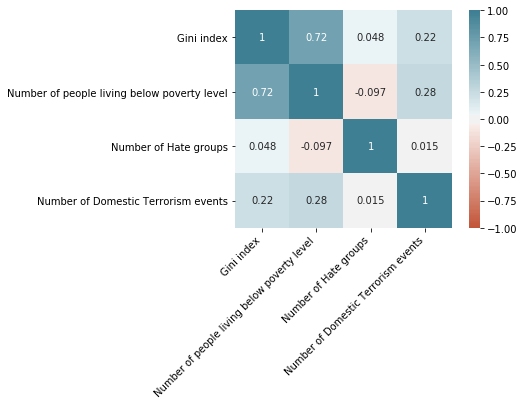

In [58]:
ax = sn.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);